In [27]:
#  Here is some Fourier Filte
# fft fun -- For Jeremy Chan -- Reading in a CSV of wind speed, plotting and Fourier transforming.

In [124]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob

In [40]:
# # Read in the data from a CSV file
# outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
# WindData = pd.read_csv(outpath + 'Final_position_centroid_method_FirstTrial_L0.1_c-3_m12.csv')
# last_trial = pd.read_csv(outpath + 'Final_position_centroid_method_LastTrial_L0.1_c-3_m12.csv')

In [166]:
# Read in the data from a CSV file
# outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
# csv_list = glob.glob(outpath + '*Trial*.csv')
# for element in csv_list:
#     print(element)
# csv_Last_list = pd.read_csv(outpath + ' *Raw*.csv')
WindData = pd.read_csv(outpath + 'Final_position_centroid_method_FirstTrial_L50_c-3_m6.csv')
last_trial = pd.read_csv(outpath + 'Final_position_centroid_method_LastTrial_L50_c-3_m6.csv')
WindData_ = pd.read_csv(outpath + 'Final_position_centroid_method_FirstTrial_L0.1_c-3_m12.csv')
last_trial_ = pd.read_csv(outpath + 'Final_position_centroid_method_LastTrial_L0.1_c-3_m12.csv')

In [167]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [168]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [178]:
def Tortuosity(df):
    
    pre_t = df.loc[:,'FrameNumber']
    t = pre_t/100
    xvel = df.loc[:,'X_position']
    yvel = df.loc[:,'Y_position']
    
    Nx = len(xvel)  #number of points
    Nt = Nx
    Time = t.values[-1]-t.values[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    list(xvel)
    meanxvel = mean(xvel)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftxvel = fft(xvel-meanxvel)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
    
    order = 5
    cutoff = 5
    
    pre_conditioned_xvel = butter_bandstop_filter(xvel, fs, order)
    
    conditioned_xvel = butter_highpass_filter(pre_conditioned_xvel, cutoff, fs, order)

    
    stdxv = np.std(conditioned_xvel)
    meanxv = np.mean(xvel)
    turb_intens = stdxv/meanxv
    
    fft_Cxvel = fft(conditioned_xvel)
    
    return xf, Nx, fft_Cxvel, stdxv, meanxv, turb_intens, conditioned_xvel

In [ ]:
outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
csv_list = glob.glob(outpath + '*Trial*.csv')

In [99]:
# just making sure the data are read in
WindData.tail() , last_trial.tail() 

(      Unnamed: 0  FrameNumber  X_position  Y_position
 4761        4761        39823       633.0        12.0
 4762        4762        39824       595.0        63.0
 4763        4763        39825       619.0        36.0
 4764        4764        39826       540.0        23.0
 4765        4765        39827       577.0        30.0,
      Unnamed: 0  FrameNumber  X_position  Y_position
 927         927        74507         NaN         NaN
 928         928        74508         NaN         NaN
 929         929        74509         NaN         NaN
 930         930        74510         NaN         NaN
 931         931        74511         NaN         NaN)

In [171]:
np.where(last_trial_.X_position.isnull())
# np.where(WindData_.X_position.isnull())

(array([  1,   2,   3,   5,   6,   7,   9,  10,  13,  14,  15,  16,  17,
         18,  19,  21,  22,  23,  24,  26,  27,  28,  30,  31,  32,  33,
         34,  35,  36,  37,  39,  40,  41,  43,  44,  46,  47,  48,  49,
         50,  52,  53,  55,  56,  57,  59,  61,  65,  69, 322, 323, 324,
        325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
        338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
        351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
        364, 365, 366, 367, 368, 369, 370, 371, 372, 373]),)

In [172]:
WindData = WindData.loc[53:4706, :]
last_trial = last_trial.loc[60:876,:]
WindData_ = WindData_.loc[51:1385, :]
last_trial_ = last_trial_.loc[70:321,:]

In [179]:
#High light
xf_first, Nx_first, fft_Cxvel_first, stdxv_first, meanxv_first, turb_intens_first, x_cond_first  = Tortuosity(WindData)
xf_last, Nx_last, fft_Cxvel_last, stdxv_last, meanxv_last, turb_intens_last, x_cond_last = Tortuosity(last_trial)
print(stdxv_first, meanxv_first, turb_intens_first)
print(stdxv_last, meanxv_last, turb_intens_last)

11.785434779884561 367.7309840996992 0.03204906654449682
11.4758969066653 418.2203182374541 0.027439835910003776


In [185]:
#Low light
xf_first_, Nx_first_, fft_Cxvel_first_, stdxv_first_, meanxv_first_, turb_intens_first_, x_cond_first_  = Tortuosity(WindData_)
xf_last_, Nx_last_, fft_Cxvel_last_, stdxv_last_, meanxv_last_, turb_intens_last_, x_cond_last_ = Tortuosity(last_trial_)
print(stdxv_first_, meanxv_first_, turb_intens_first_)
print(stdxv_last_, meanxv_last_, turb_intens_last_)

12.781469973750397 460.58801498127343 0.02775033122446763
11.887708591113379 435.74603174603175 0.027281277911997043


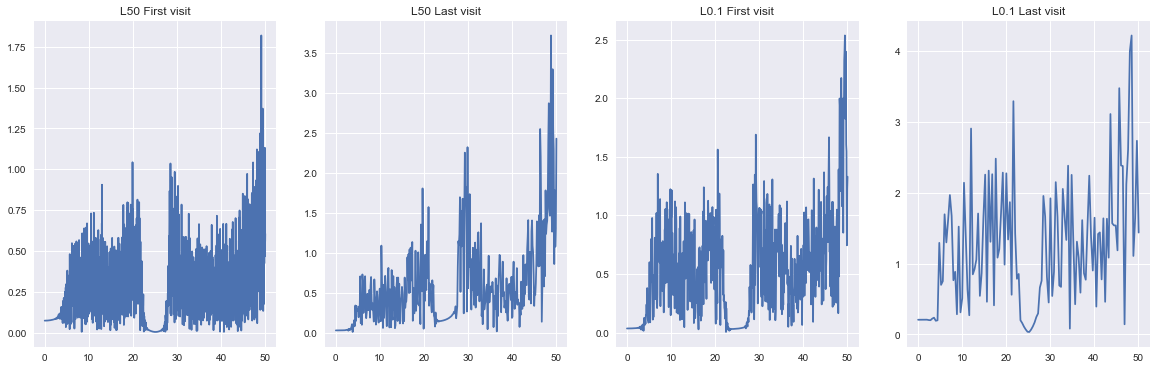

In [186]:
fig, ax = plt.subplots(1,4 , figsize = (20,6))
ax[0].plot(xf_first, 2.0/Nx_first * np.abs(fft_Cxvel_first[0:Nx_first//2]))
ax[0].set_title('L50 First visit')
ax[1].plot(xf_last, 2.0/Nx_last * np.abs(fft_Cxvel_last[0:Nx_last//2]))
ax[1].set_title('L50 Last visit')
ax[2].plot(xf_first_, 2.0/Nx_first_ * np.abs(fft_Cxvel_first_[0:Nx_first_//2]))
ax[2].set_title('L0.1 First visit')
ax[3].plot(xf_last_, 2.0/Nx_last_ * np.abs(fft_Cxvel_last_[0:Nx_last_//2]))
ax[3].set_title('L0.1 Last visit')
plt.show()   

sb.set()

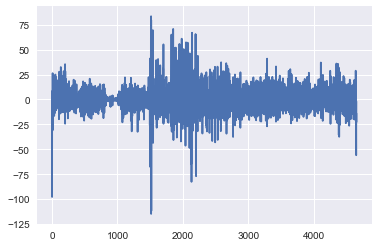

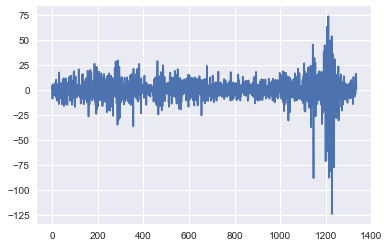

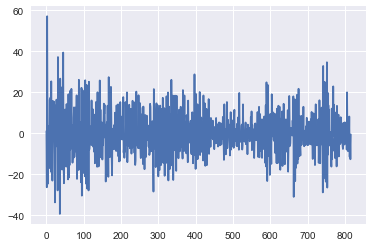

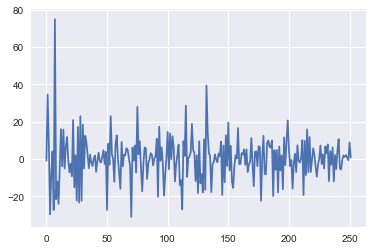

In [187]:
plt.plot(x_cond_first)
plt.show()
plt.plot(x_cond_first_)
plt.show()
plt.plot(x_cond_last)
plt.show()
plt.plot(x_cond_last_)
plt.show()

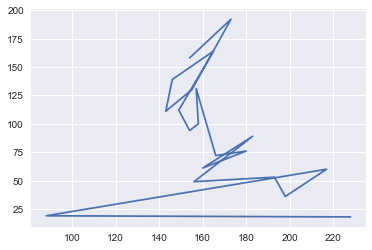

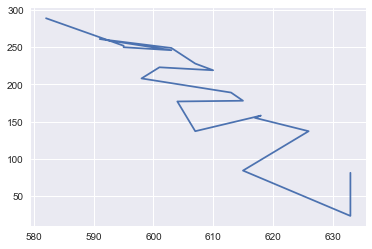

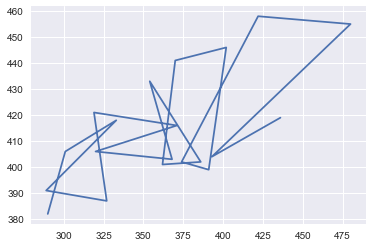

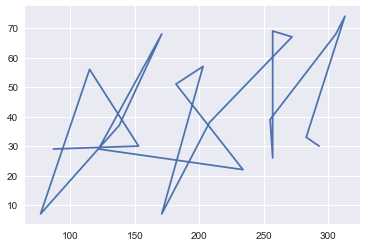

In [190]:
plt.plot(WindData.X_position[0:20:] , WindData.Y_position[0:20:])
plt.show()
plt.plot(WindData_.X_position[0:20:], WindData_.Y_position[0:20:])
plt.show()
plt.plot(last_trial.X_position[0:20:], last_trial.Y_position[0:20:])
plt.show()
plt.plot(last_trial_.X_position[0:20:], last_trial_.Y_position[0:20:])
plt.show()

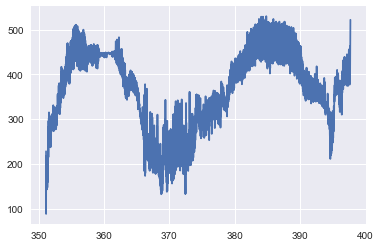

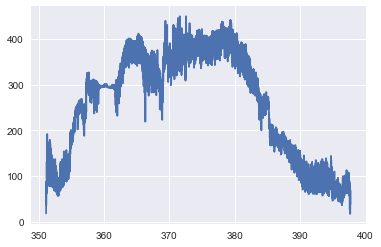

In [102]:
#  Assign the right column to the right number
pre_t = WindData.loc[:,'FrameNumber']
t = pre_t/100
xvel = WindData.loc[:,'X_position']
yvel = WindData.loc[:,'Y_position']
# zvel = WindData.iloc[:,0]
# and then plot the time series
plt.plot(t,xvel)
plt.show()
plt.plot(t,yvel)
plt.show()
# plt.plot(t,zvel)
plt.show()
# sb.set()

In [103]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [104]:
pre_t_final = last_trial.loc[:,'FrameNumber']
t_final = pre_t_final/100
xvel_final = last_trial.loc[:,'X_position']
yvel_final = last_trial.loc[:,'Y_position']

In [105]:
t.values[-1]

397.68

In [106]:
Nx = len(xvel)  #number of points
Nt = Nx
Time = t.values[-1]-t.values[0]   #total sample time (in seconds)c
fs = Nx/Time   # sample frequency
TT = 1/fs  #delta t.
list(xvel)
meanxvel = mean(xvel)   # snag a mean and remove it from data to inspect fft
print(Nx,Time,fs)

4654 46.53000000000003 100.02149151085315


In [107]:
Nx_ = len(xvel_final)  #number of points
Nt_ = Nx_
Time_ = t_final.values[-1]-t_final.values[0]   #total sample time (in seconds)c
fs_ = Nx_/Time_   # sample frequency
TT_ = 1/fs_  #delta t.
list(xvel_final)
meanxvel_ = mean(xvel_final)   # snag a mean and remove it from data to inspect fft
print(Nx_,Time_,fs_)

817 8.159999999999968 100.12254901960823


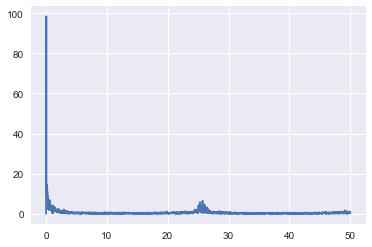

In [108]:
fftxvel = fft(xvel-meanxvel)    # this is the Fourier tranform of the x velocity
   # . fftxvel is complex with real and imaginary part.
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.show()   
sb.set()

In [109]:
fftxvel_ = fft(xvel_final-meanxvel_)
xf_ = np.linspace(0.0, 1.0/(2.0*TT_), Nx_//2)

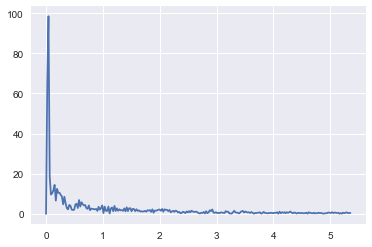

In [110]:
Nmax = 250  #just looking at the low frequencies (the first 100)
plt.plot(xf[0:Nmax], 2.0/Nx * np.abs(fftxvel[0:Nmax]))
# plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.show()   
sb.set()

In [146]:
#  Here we implement a butterworth filter.  Kinda a useful beast for smoothing data.  
# . It is a high pass filter, bascially flattening your signal

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [112]:
cutoff = 5
order = 5
conditioned_xvel = butter_highpass_filter(xvel, cutoff, fs, order)
conditioned_xvel_final = butter_highpass_filter(xvel_final, cutoff, fs_, order)

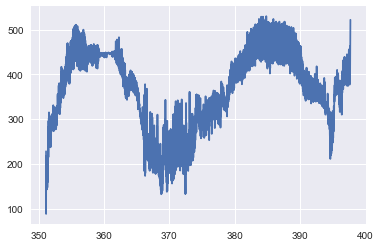

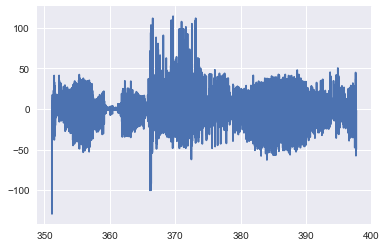

In [113]:
plt.plot(t,xvel)
plt.show()
plt.plot(t,conditioned_xvel)
plt.show()

In [114]:
#  Here we implement a butterworth filter.  Kinda a useful beast for smoothing data.  
# We are creating a bandstop filter to get rid of wing beat frequesicies.

def butter_bandstop(fs, order=5):
    nyq = 0.5 * fs
    low = 22 / nyq
    high = 28 / nyq
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    return b, a

def butter_bandstop_filter(data, fs, order=5):
    b, a = butter_bandstop(fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [115]:
order = 5
again_conditioned_xvel = butter_bandstop_filter(xvel, fs, order)
again_conditioned_xvel_final = butter_bandstop_filter(xvel_final, fs_, order)

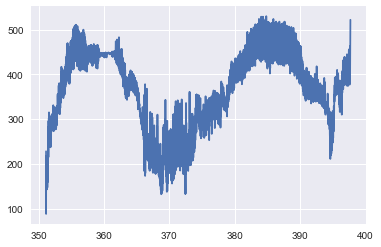

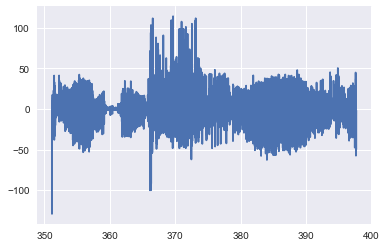

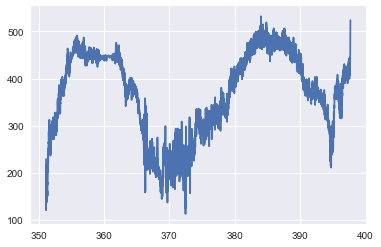

In [133]:
plt.plot(t,xvel)
plt.show()
plt.plot(t,conditioned_xvel)
plt.show()
plt.plot(t,again_conditioned_xvel)
plt.show()

In [117]:
#with the data filtered to remove low frequency, we can compute a reasonable estimate 
# of u' using the standard deviation from the mean.  It's value strongly depends on the filter cutoff.
stdxv = np.std(again_conditioned_xvel)
meanxv = np.mean(xvel)
turb_intens = stdxv/meanxv
print(meanxv,stdxv,turb_intens)

367.7309840996992 91.00891892488782 0.24748776377302353


In [118]:
stdxv_ = np.std(again_conditioned_xvel_final)
meanxv_ = np.mean(xvel_final)
turb_intens_ = stdxv_/meanxv_
print(meanxv_,stdxv_,turb_intens_)

418.2203182374541 69.06433017615457 0.16513862948414124


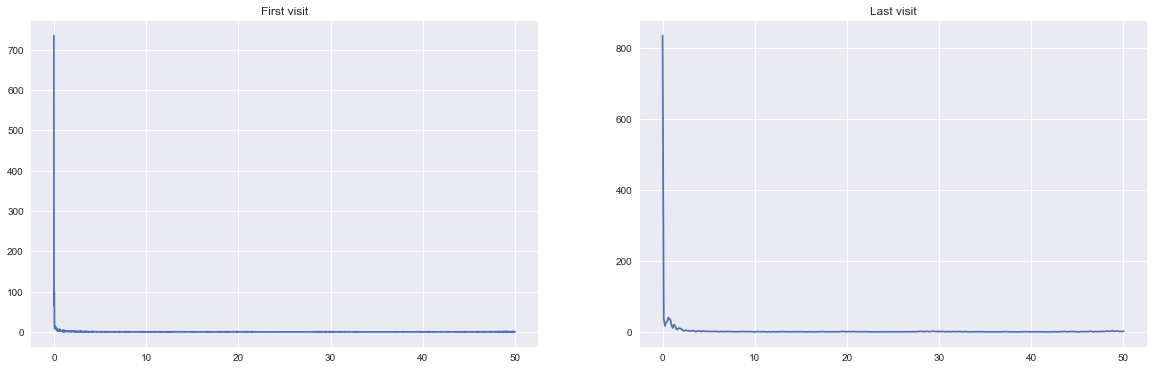

In [97]:
fft_Cxvel = fft(again_conditioned_xvel) # this is the Fourier tranform of the  filtered x-velocity
fft_Cxvel_ = fft(again_conditioned_xvel_final) 

#  just showing that the cut-off frequency makes sense
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
xf_ = np.linspace(0.0, 1.0/(2.0*TT_), Nx_//2)
fig, ax = plt.subplots(1,2 , figsize = (20,6))
ax[0].plot(xf, 2.0/Nx * np.abs(fft_Cxvel[0:Nx//2]))
ax[0].set_title('First visit')
ax[1].plot(xf_, 2.0/Nx_ * np.abs(fft_Cxvel_[0:Nx_//2]))
ax[1].set_title('Last visit')
plt.show()   
sb.set()

In [55]:
start = [53, 60]
end = [4700, 876]
i = 0
for element in csv_list:
    trial_data = pd.read_csv(outpath + element)
    
    pre_t = trial_data.loc[start[i]:end[i],'FrameNumber']
    t = pre_t/100
    xvel = trial_data.loc[start[i]:end[i],'X_position']
    yvel = trial_data.loc[start[i]:end[i],'Y_position']
    
    Nx = len(xvel)  #number of points
    Nt = Nx
    Time = t[end[i]]-t[start[i]]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    list(xvel)
    meanxvel = mean(xvel)
    
    i += 1

360.6263113722199

In [78]:
35115, 39768

array([nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])